In [2]:
#Unzip Data From drive to local
!unzip '/content/drive/MyDrive/Semester 1/AAAI/Assignments/Assignment 2/data.zip'

Streaming output truncated to the last 5000 lines.
  inflating: data/vehicles/3675.png  
  inflating: __MACOSX/data/vehicles/._3675.png  
  inflating: data/vehicles/far (478).png  
  inflating: __MACOSX/data/vehicles/._far (478).png  
  inflating: data/vehicles/3885.png  
  inflating: __MACOSX/data/vehicles/._3885.png  
  inflating: data/vehicles/2543.png  
  inflating: __MACOSX/data/vehicles/._2543.png  
  inflating: data/vehicles/far (497).png  
  inflating: __MACOSX/data/vehicles/._far (497).png  
  inflating: data/vehicles/4132.png  
  inflating: __MACOSX/data/vehicles/._4132.png  
  inflating: data/vehicles/4654.png  
  inflating: __MACOSX/data/vehicles/._4654.png  
  inflating: data/vehicles/2225.png  
  inflating: __MACOSX/data/vehicles/._2225.png  
  inflating: data/vehicles/left (685).png  
  inflating: __MACOSX/data/vehicles/._left (685).png  
  inflating: data/vehicles/1738.png  
  inflating: __MACOSX/data/vehicles/._1738.png  
  inflating: data/vehicles/left (1).png  
  inf

In [3]:
data_path = '/content/data'

In [ ]:
import os
import cv2 
import matplotlib.pyplot as plt
import numpy as np

#Feature Extraction
from skimage.feature import canny
from skimage.feature import blob_log

In [7]:
import os

os.path.join(data_path, 'vehicles')

'/content/data/vehicles'

In [8]:
vehicle_images = os.listdir(os.path.join(data_path, 'vehicles'))
non_vehicle_images = os.listdir(os.path.join(data_path, 'non-vehicles'))

vehicle_images = [os.path.join(data_path, 'vehicles', img) for img in vehicle_images]
non_vehicle_images = [os.path.join(data_path, 'non-vehicles', img) for img in non_vehicle_images]

print("Total Vehicle Images: ", len(vehicle_images))
print("Total Non-Vehicle Images: ", len(non_vehicle_images))
print(vehicle_images)
print(non_vehicle_images)

Total Vehicle Images:  8792
Total Non-Vehicle Images:  8968
['/content/data/vehicles/2586.png', '/content/data/vehicles/far (169).png', '/content/data/vehicles/far (448).png', '/content/data/vehicles/1463.png', '/content/data/vehicles/404.png', '/content/data/vehicles/far (618).png', '/content/data/vehicles/far (10).png', '/content/data/vehicles/far (473).png', '/content/data/vehicles/1085.png', '/content/data/vehicles/right (219).png', '/content/data/vehicles/2345.png', '/content/data/vehicles/3004.png', '/content/data/vehicles/1346.png', '/content/data/vehicles/left (680).png', '/content/data/vehicles/4521.png', '/content/data/vehicles/far (60).png', '/content/data/vehicles/4848.png', '/content/data/vehicles/2757.png', '/content/data/vehicles/3070.png', '/content/data/vehicles/4504.png', '/content/data/vehicles/4137.png', '/content/data/vehicles/872.png', '/content/data/vehicles/3264.png', '/content/data/vehicles/left (686).png', '/content/data/vehicles/3741.png', '/content/data/vehi

In [29]:
import cv2
from matplotlib import pyplot as plt
from skimage import feature

img_path = vehicle_images[101]
img = cv2.imread(img_path)
print(img.shape)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img2.shape)

features1 = feature.canny(img2)

(64, 64, 3)
(64, 64)


In [30]:
img_path = vehicle_images[101]
img = cv2.imread(img_path)
print(img.shape)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
features2 = feature.blob_log(img2)


(64, 64, 3)


In [35]:
import numpy as np
features1 = features1.flatten()
features2 = features2.flatten()

feature_set = np.concatenate([features1, features2])

print(features1.shape)
print(features2.shape)

print(feature_set.shape)

(4096,)
(30,)
(4126,)


In [36]:
def feature_selection(feature, size, opt):
  if opt=='start':
    feature = feature[0:size]
  elif opt=='end':
    feature = feature[-size:]

  return feature


In [38]:
selected_features = feature_selection(feature_set, 100, 'end')
print(selected_features.shape)

(100,)


In [ ]:
ones = np.ones((len(vehicle_images)))
zeros = np.zeros((len(non_vehicle_images)))
print(ones.shape)
print(zeros.shape)

(8792,)
(8968,)


In [ ]:
paths = vehicle_images + non_vehicle_images
labels = np.concatenate([ones, zeros])

print(len(paths))
print(labels.shape)

17760
(17760,)


Image Size:  (64, 64, 3)
Image Features:  12288


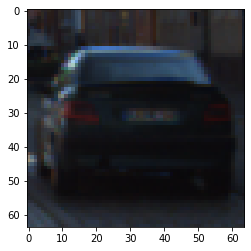

In [ ]:
image = cv2.imread(os.path.join(data_path, 'vehicles', vehicle_images[0]))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_shape = image.shape
print("Image Size: ",image_shape)
print("Image Features: ",image_shape[0]*image_shape[1]*image_shape[2])
plt.imshow(image)

(64, 64)


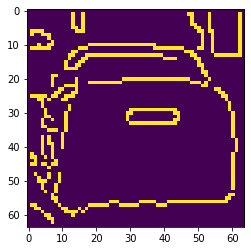

In [ ]:
##Feature Extraction
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
edges = canny(image)
print(edges.shape)
plt.imshow(edges)

In [ ]:
extracted_features = blob_log(edges, threshold = .3).shape

(104, 3)

In [39]:
import os
import cv2 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Feature Extraction
from skimage.feature import canny
from skimage.feature import blob_log

import os
import cv2
import time
import numpy as np
import pandas as pd
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import sklearn
from sklearn import metrics as mc

from torch.utils.data import DataLoader, Dataset
from torch.utils.data import RandomSampler

import torchvision.transforms as T
import torchvision.models as models
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder


In [42]:
print(len(vehicle_images))
print(len(non_vehicle_images))

8792
8968


In [48]:
ones = np.ones(len(vehicle_images))
zeros = np.zeros(len(non_vehicle_images))
print(zeros.shape)

(8968,)


In [51]:
image_path = vehicle_images + non_vehicle_images
labels = np.concatenate([ones, zeros])

print(len(image_path))
print(labels.shape)

17760
(17760,)


In [84]:
class VDataset(Dataset):
    
    def __init__(self, image_paths, labels, fe, fs):
        
        super().__init__()
        self.image_paths = image_paths
        self.labels = labels
        self.fe = fe
        self.fs =fs
        
        
    def __getitem__(self, index):
    
        image_path = self.image_paths[index]
        label = self.labels[index]
        
        image = cv2.imread(image_path,1)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


        img2 = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        features1 = feature.canny(img2)
        features2 = feature.blob_log(img2)
        features1 = features1.flatten()
        features2 = features2.flatten()
        feature_set = np.concatenate([features1, features2])

        if self.fs == 'start':
          feature_set = feature_set[0:100]
        elif self.fs == 'end':
          feature_set = feature_set[-100:]
        

        
      
        features_set = np.array(feature_set, dtype=np.float32)

        features_set = torch.tensor(features_set)
        label = torch.tensor(label)
        
        return image, label, features_set
        
        
        
    def __len__(self):
        return len(self.image_paths)

In [85]:
dataset = VDataset(image_paths = image_path, labels = labels, fe = None, fs='start')

In [86]:
dataloader = DataLoader(dataset, batch_size=8)

In [80]:
for image, label, features_set in dataloader:
  print(image.shape)
  print(features_set.shape)
  print(label.shape)
  print(label)
  break


(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
torch.Size([8, 64, 64, 3])
torch.Size([8, 100])
torch.Size([8])
tensor([1., 1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)


In [76]:
class VClassification(torch.nn.Module):
    def __init__(self, input=100, output=1):
        super(VClassification, self).__init__()
        
        
        self.l1 = torch.nn.Linear(100, 20)
        self.l2 = torch.nn.Linear(20, 40)
        self.l3 = torch.nn.Linear(40, 1)

        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, inp):
      inp = self.l1(inp)
      inp = self.l2(inp)
      inp = self.l3(inp)
      inp = self.sigmoid(inp)
      return inp

In [77]:
model = VClassification()

In [78]:
print(model)

VClassification(
  (l1): Linear(in_features=100, out_features=20, bias=True)
  (l2): Linear(in_features=20, out_features=40, bias=True)
  (l3): Linear(in_features=40, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [91]:
### Dataset
### Dataset Read
## Label

## 2 Arrays
## image_paths = [vehicles + non_vehiocles]
## label = [ones + zeros]


##Dataset Class 
  # - image_paths, labels, fe, fs

## Dataloader(Dataset, Batch Size)

## Model 


## Dataloader, Model, LossFunction, Optimizer, Training loop


optimizer = torch.optim.Adam(model.parameters(), lr = 0.001) 
loss_function = nn.BCELoss()


In [113]:
for epoch in range(1):
  for _, label, feature_set in dataloader:

    label = label.unsqueeze(dim=1).double()
    preds = model(feature_set)
    preds = torch.where(preds>=0.5, 1.0, 0.0).double()
    preds = torch.tensor(preds, requires_grad=True)

    # print(label)
    # print(preds)

    loss = loss_function(preds, label)
    print(loss.item())
    loss.backward()
    optimizer.step()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


0.0
0.0
37.5
0.0
12.5
0.0
12.5
0.0
12.5
12.5
12.5
12.5
0.0
12.5
0.0
12.5
0.0
12.5
12.5
12.5
12.5
0.0
25.0
25.0
25.0
12.5
12.5
25.0
12.5
12.5
25.0
0.0
0.0
50.0
25.0
25.0
12.5
0.0
12.5
37.5
12.5
12.5
25.0
25.0
12.5
25.0
0.0
0.0
12.5
12.5
37.5
12.5
37.5
0.0
25.0
0.0
0.0
12.5
12.5
50.0
12.5
25.0
50.0
50.0
25.0
0.0
25.0
0.0
25.0
12.5
0.0
0.0
0.0
0.0
12.5
25.0
25.0
25.0
0.0
37.5
12.5
12.5
0.0
12.5
12.5
12.5
12.5
0.0
0.0
0.0
0.0
25.0
12.5
25.0
25.0
25.0
25.0
50.0
25.0
12.5
25.0
0.0
37.5
0.0
37.5
12.5
12.5
50.0
0.0
0.0
0.0
12.5
62.5
12.5
12.5
0.0
37.5
25.0
12.5
25.0
12.5
25.0
25.0
0.0
50.0
25.0
12.5
0.0
25.0
12.5
0.0
25.0
62.5
12.5
12.5
37.5
12.5
12.5
0.0
0.0
25.0
12.5
0.0
0.0
12.5
12.5
0.0
0.0
25.0
25.0
0.0
0.0
25.0
12.5
25.0
12.5
37.5
0.0
12.5
12.5
12.5
12.5
12.5
12.5
12.5
12.5
25.0
12.5
12.5
0.0
25.0
25.0
25.0
12.5
12.5
12.5
0.0
37.5
25.0
12.5
12.5
25.0
12.5
25.0
25.0
12.5
37.5
25.0
12.5
12.5
0.0
0.0
12.5
12.5
0.0
12.5
12.5
12.5
12.5
37.5
62.5
0.0
25.0
25.0
12.5
12.5
12.5
0.0
0.0
25.0
25.0


KeyboardInterrupt: ignored